In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from blcommon.timer import Timer

plt.style.use('scandic')

In [56]:
def polar_to_cartesian(theta, phi):
    '''
    Convert spherical coordinates to cartesian coordinates.

    Parameters
    ----------
    theta : array_like
        Array of theta values.
    phi : array_like
       Array of phi values.

    Returns
    -------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.
    '''
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_on_sphere(x, y, z, ax=None):
    '''
    Plot points on a sphere. Returns a matplotlib figure.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    fig : matplotlib figure
        Figure containing the plot.

    '''

    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x_sphere = r*sin(phi)*cos(theta)
    y_sphere = r*sin(phi)*sin(theta)
    z_sphere = r*cos(phi)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x_sphere, y_sphere, z_sphere,  rstride=1, cstride=1, color='C1', alpha=0.3, linewidth=0)

    ax.scatter(x,y,z,color="k",s=20)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    return fig

def cartesian_to_polar(x, y, z):
    '''
    Convert cartesian coordinates to spherical coordinates.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    theta : array_like
        Array of theta values.
    phi : array_like
        Array of phi values.
    '''
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y,x)
    return theta, phi
    

# Generating random points on sphere

## What is uniform and how to visualise it?

Lets say I would use the spherical coordinates $\phi \in \left< 0, 2\pi\right>,\, \theta\in\left<0, \pi\right>$. And lets say I would generate one point every 15º of anfle one point. What does this lead to? 

Around the 'poles' ($\theta = 0,\,\theta = 2\pi $) there would be several 'circles' of points. On the other hand if we take point on the 'equator'($\theta = \pi$), in the same suroundings of this point there will be less points. However there should not really matter on the orientation of the sphere, if we want the points to be uniformly distributed. Wherever we take a point, there should be the same number of points in the same surroundings.

**Outcome:**

The distribuion of points as well as the visualisation method should be independent of the orientation of the sphere.

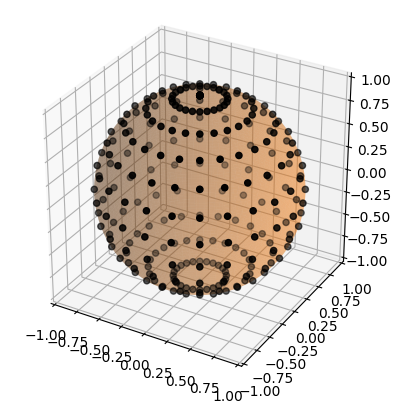

In [4]:
theta = np.arange(0, np.pi, 15/180*np.pi)
phi = np.arange(0, 2*np.pi, 15/180*np.pi)
theta, phi = np.meshgrid(theta, phi)

# plotting 
x, y, z = polar_to_cartesian(theta, phi)
fig = plot_on_sphere(x, y, z)
plt.show()

In [5]:
@Timer("generate_1")
def generate_1(no_of_points):
    '''
    Generate points on a sphere using the method described in the problem statement.

    Parameters
    ----------
    no_of_points : int
        Number of points to generate.

    Returns
    -------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.
    '''
    #generates n random 3D vectors between -1 and 1
    x = np.random.uniform(-1,1,no_of_points)
    y = np.random.uniform(-1,1,no_of_points)
    z = np.random.uniform(-1,1,no_of_points)
    r = np.array([x,y,z])
    #normalizes the vectors
    r_norm = np.linalg.norm(r,axis=0)
    r_norm = np.tile(r_norm,(3,1))
    r = r/r_norm
    return r[0],r[1],r[2]


generate_1 > Elapsed time: 0.0006 seconds


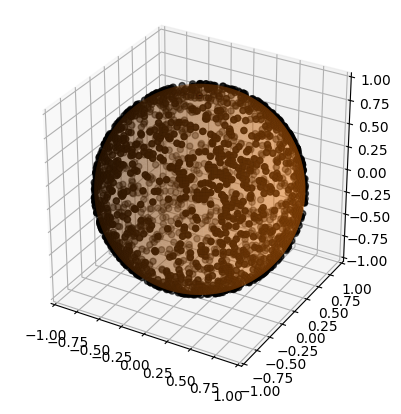

In [49]:
# trying the function
x,y,z = generate_1(2000)
fig = plot_on_sphere(x, y, z)
plt.show()

In [47]:
@Timer("generate_2")
def generate_2(no_of_points):
    ''' 
    Choose 3 random numbers between −1 and 1 and interpret them as a vector,⃗ v. Discard all vectors with |⃗v| > 1 and normalize the rest, as above. Repeat until you have n vectors.
    '''
    x = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    y = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    z = np.random.uniform(-1,1,int(no_of_points*np.sqrt(5)))
    r = np.array([x,y,z])
    # print(r.shape)
    r_norm = np.linalg.norm(r,axis=0)
    # print(r_norm.shape)
    r_norm = np.tile(r_norm,(3,1))
    # print(r_norm.shape)
    r = r[r_norm<=1]
    # print(r.shape)
    r_norm = r_norm[r_norm<=1]
    r = r/r_norm
    #reshaping the array
    r = r.reshape(3,-1)
    r = r[:,:no_of_points]
    return r[0],r[1],r[2]


generate_2 > Elapsed time: 0.0014 seconds


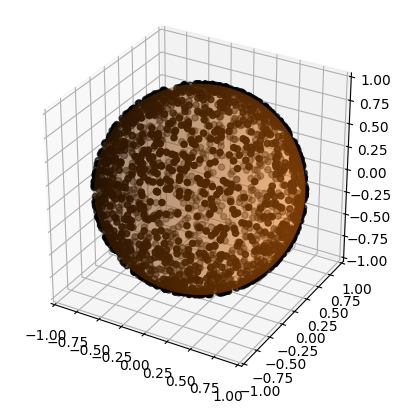

In [48]:
x,y,z = generate_2(2000)
fig = plot_on_sphere(x, y, z)
plt.show()

In [51]:
@Timer("generate_3")
def generate_3(no_of_points):
    '''
    Choose 2 random numbers φ ∈ [0, 2π) and ϑ ∈ [0, π] and interpret (ϑ , φ ) as the spherical
    coordinates of the vector.
    '''
    theta = np.random.uniform(0,np.pi,no_of_points)
    phi = np.random.uniform(0,2*np.pi,no_of_points)
    x,y,z = polar_to_cartesian(theta,phi)
    return x,y,z
    

generate_3 > Elapsed time: 0.0002 seconds


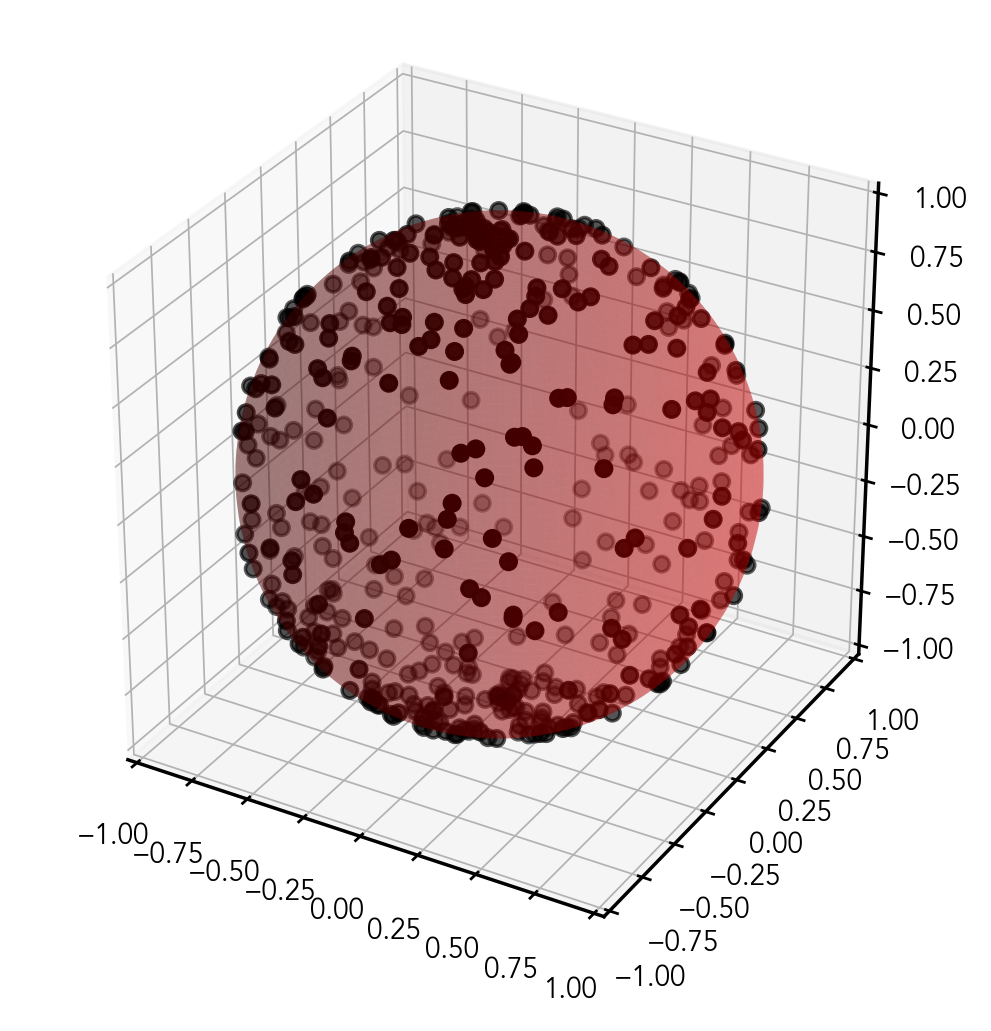

In [66]:
x,y,z = generate_3(500)
fig = plot_on_sphere(x, y, z)
plt.show()

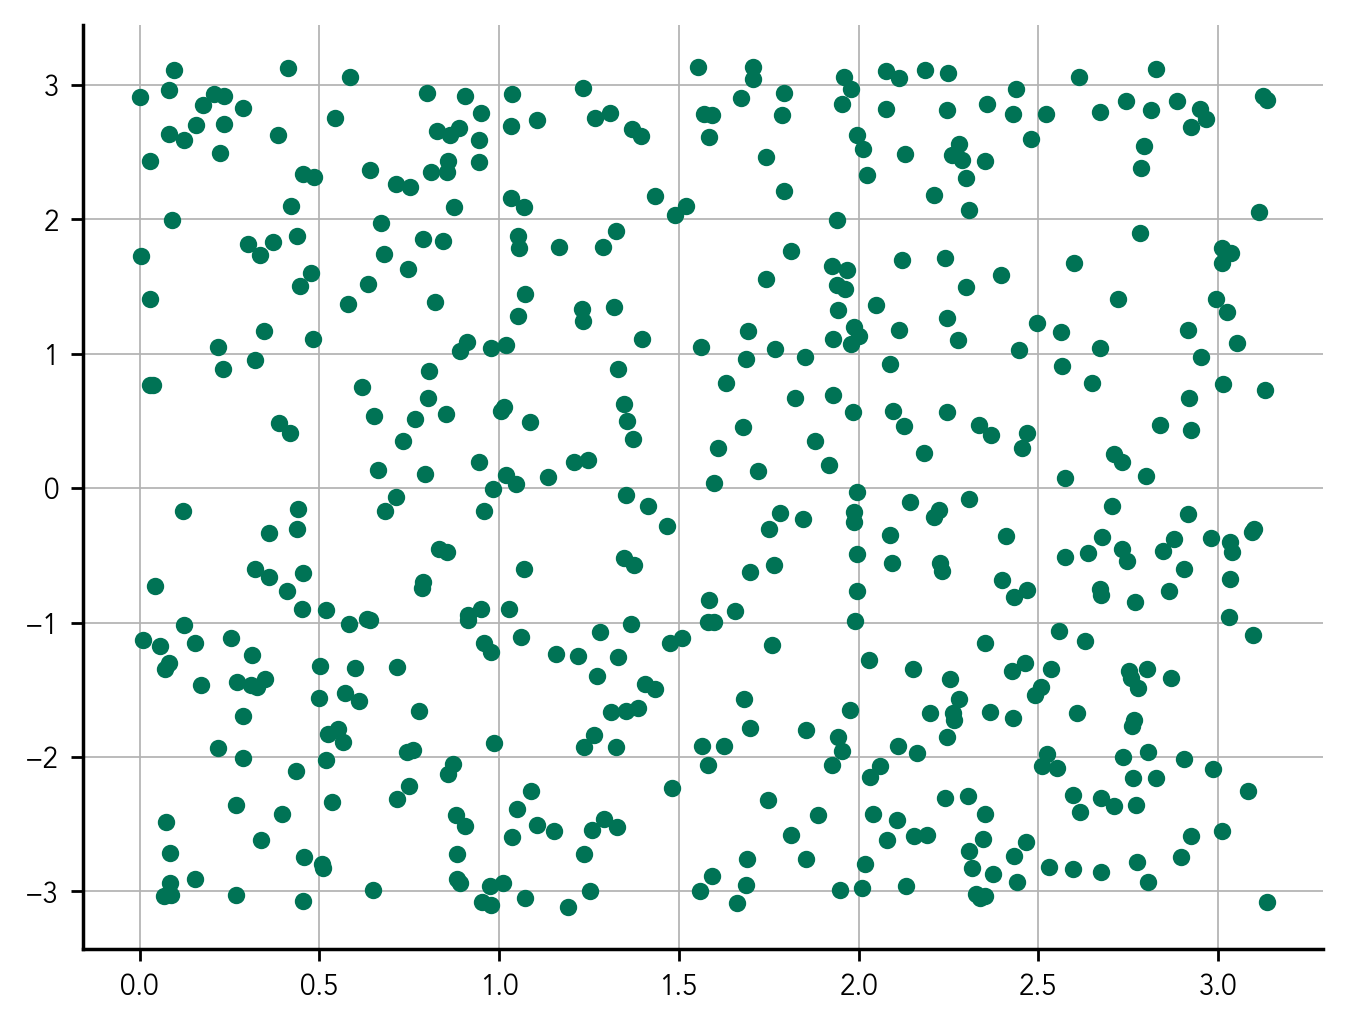

In [67]:
plt.plot(cartesian_to_polar(x,y,z)[0],cartesian_to_polar(x,y,z)[1],'o')

idea s kulovym vrchlikem !!

Text(1, 0, 'z position')

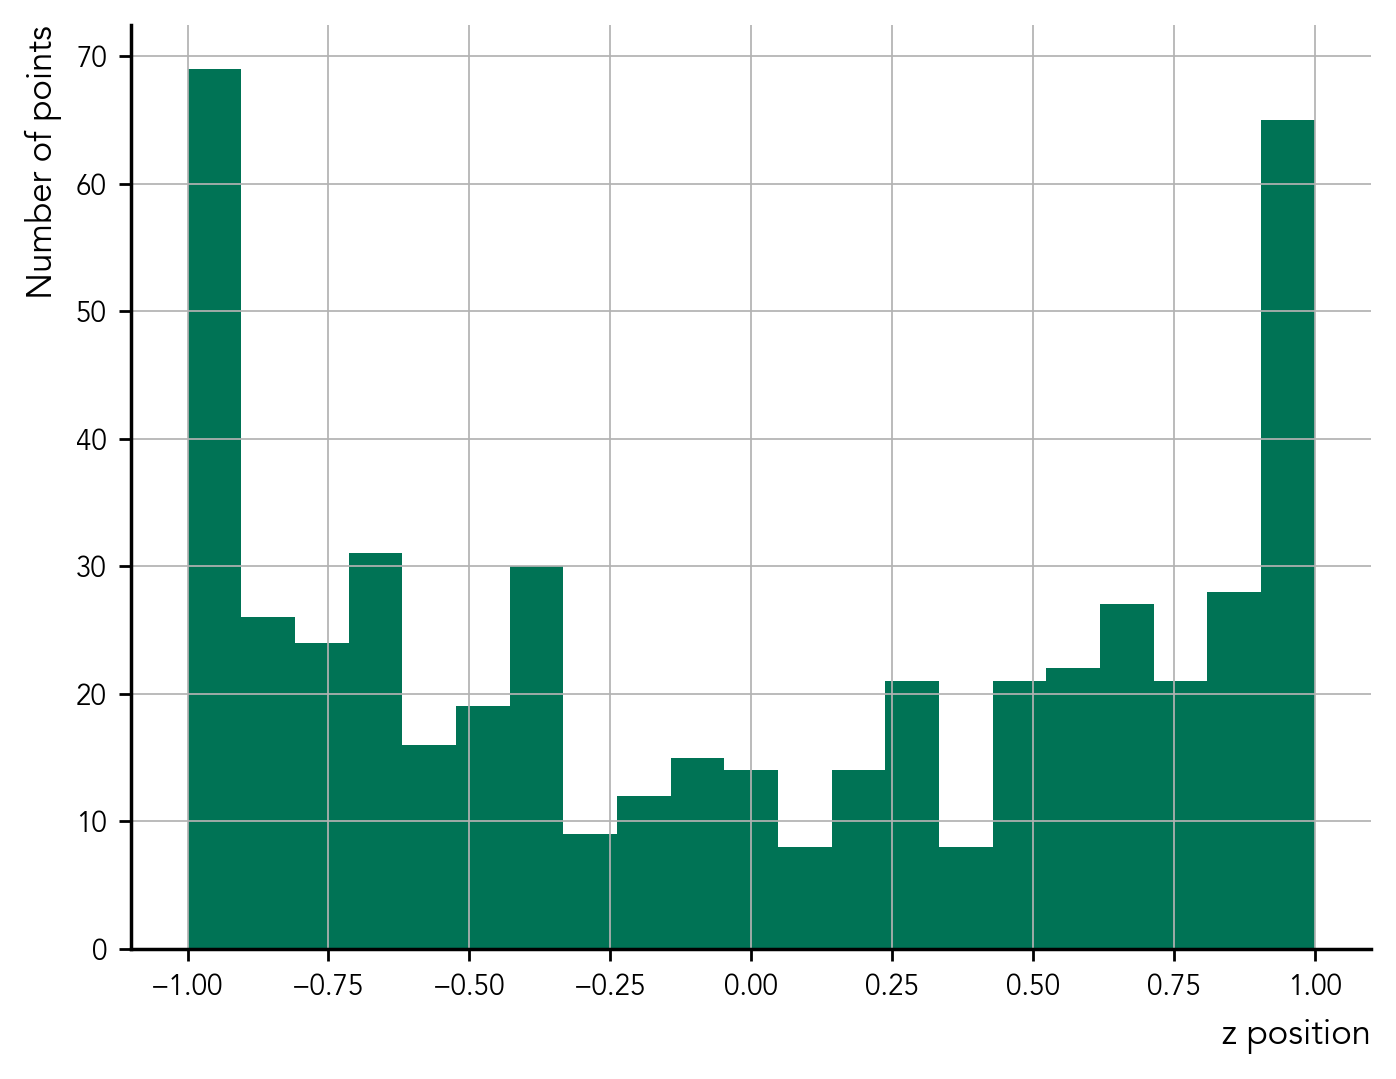

In [76]:
plt.hist(z, bins=21, align='mid')
plt.ylabel('Number of points')
plt.xlabel('z position')


In [77]:
@Timer("generate_4")
def generate_4(no_of_points):
    '''Choose 2 random numbers φ ∈ [0, 2π) and cos(ϑ ) ∈ [−1, 1] and interpret (ϑ , φ ) as the
    spherical coordinates of the vector.
    '''
    theta = np.arccos(np.random.uniform(-1,1,no_of_points))
    phi = np.random.uniform(0,2*np.pi,no_of_points)
    x,y,z = polar_to_cartesian(theta,phi)
    return x,y,z

generate_4 > Elapsed time: 0.0006 seconds


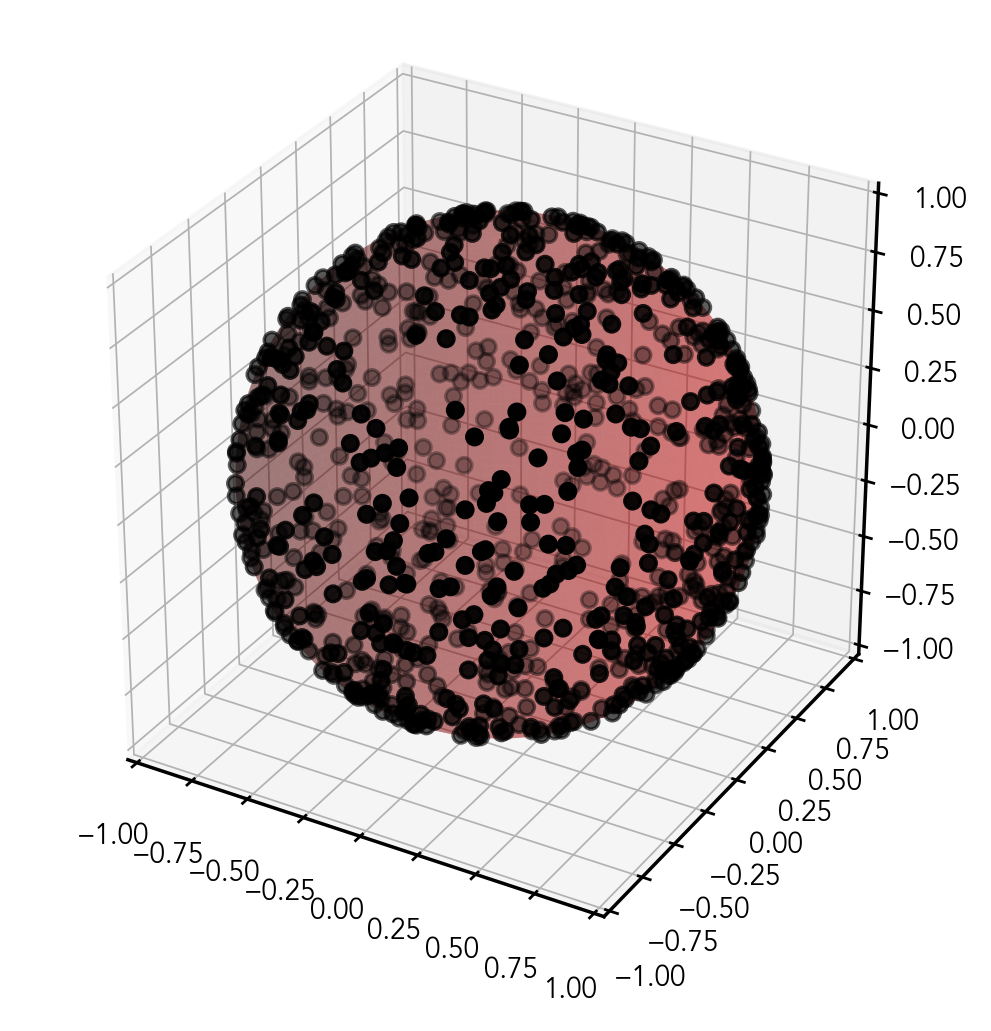

In [79]:
x,y,z = generate_4(1000)
fig = plot_on_sphere(x, y, z)
plt.show()


In [7]:
# calculate the density of point per unit area for each 1/8th of the sphere

def density_per_eighth(x,y,z):
    '''
    Calculate the density of points per unit area for each 1/8th of the sphere.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    density : array_like
        Array of densities.
    '''
    #calculates the area of the sphere
    area = 4*np.pi
    #calculates the number of points in the first 1/8th of the sphere
    x1 = x[x>0]
    y1 = y[x>0]
    z1 = z[x>0]
    no_of_points1 = len(x1)

    #calculates the number of points in the second 1/8th of the sphere
    x2 = x[x<0]
    y2 = y[x<0]
    z2 = z[x<0]

    


def density(x,y,z):
    '''
    Calculate the density of points per unit area.

    Parameters
    ----------
    x : array_like
        Array of x values.
    y : array_like
        Array of y values.
    z : array_like
        Array of z values.

    Returns
    -------
    density : float
        Density of points per unit area.
    '''
    #calculates the area of the sphere
    area = 4*np.pi
    #calculates the number of points
    no_of_points = len(x)
    #calculates the density
    density = no_of_points/area
    return density

# trying the function
density(x,y,z)



39.78873577297384